# Task
Ce dataset contient plusieurs variables, notamment l'âge, l'ancienneté, le revenu, le statut marital et d'autres caractéristiques des clients. L'objectif est d'explorer ces données pour mieux comprendre les tendances et relations entre les variables. Une attention particulière est portée à la colonne custcat, qui représente la catégorie des clients. Nous avons identifié que ce problème relève de la classification multiclasses, ce qui nous pousse à appliquer des méthodes adaptées pour l'analyse et la modélisation.

Here is all the data you need:
"teleCust1000t.csv"

## Data loading

### Subtask:
Load the dataset "teleCust1000t.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "teleCust1000t.csv" into a pandas DataFrame and display its first few rows to verify.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('teleCust1000t.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'teleCust1000t.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None # Assign None to df in case of error
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify potential issues, and gain initial insights. Focus on the 'custcat' column.


**Reasoning**:
I need to explore the dataset, focusing on the 'custcat' column, as instructed. This includes examining data types, missing values, summarizing numerical features, analyzing the target variable's distribution, and investigating the data's shape. I will perform these steps in a single code block.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None
region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64
          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.00

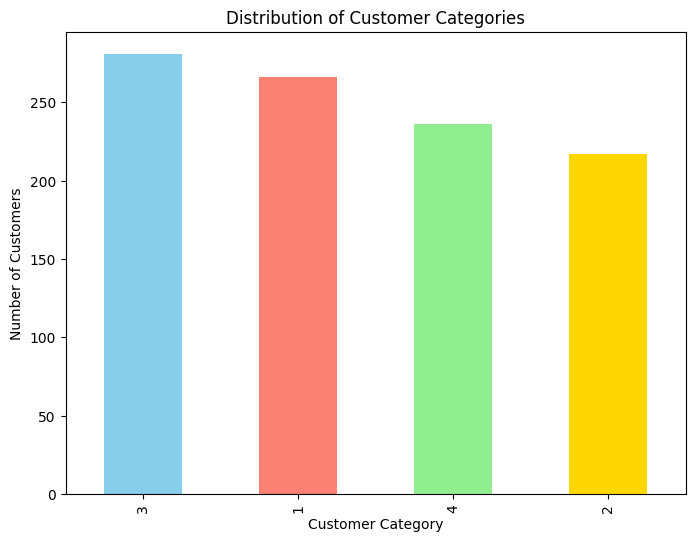

Number of unique values in 'custcat': 4
Shape of the DataFrame: (1000, 12)
Number of unique values in 'region': 3
Number of unique values in 'marital': 2
Number of unique values in 'gender': 2
Number of unique values in 'reside': 8
Number of unique values in 'age': 60
Number of unique values in 'tenure': 72
Number of unique values in 'income': 218
Number of unique values in 'ed': 5
Number of unique values in 'employ': 46


In [2]:
# Examine Data Types and Missing Values
print(df.info())
print(df.isnull().sum())

# Summarize Numerical Features
print(df.describe())

# Analyze the Target Variable ('custcat')
print(df['custcat'].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['custcat'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.title('Distribution of Customer Categories')
plt.xlabel('Customer Category')
plt.ylabel('Number of Customers')
plt.show()

print("Number of unique values in 'custcat':", df['custcat'].nunique())
# Investigate Data Shape
print("Shape of the DataFrame:", df.shape)

# Number of unique values in other relevant columns
for col in ['region', 'marital', 'gender', 'reside', 'age', 'tenure', 'income', 'ed', 'employ']:
    print(f"Number of unique values in '{col}':", df[col].nunique())

## Data visualization

### Subtask:
Visualize the relationships between variables in the dataset, focusing on the 'custcat' target variable.


**Reasoning**:
Create histograms, box plots, and bar charts to visualize the relationships between variables and the 'custcat' target variable.



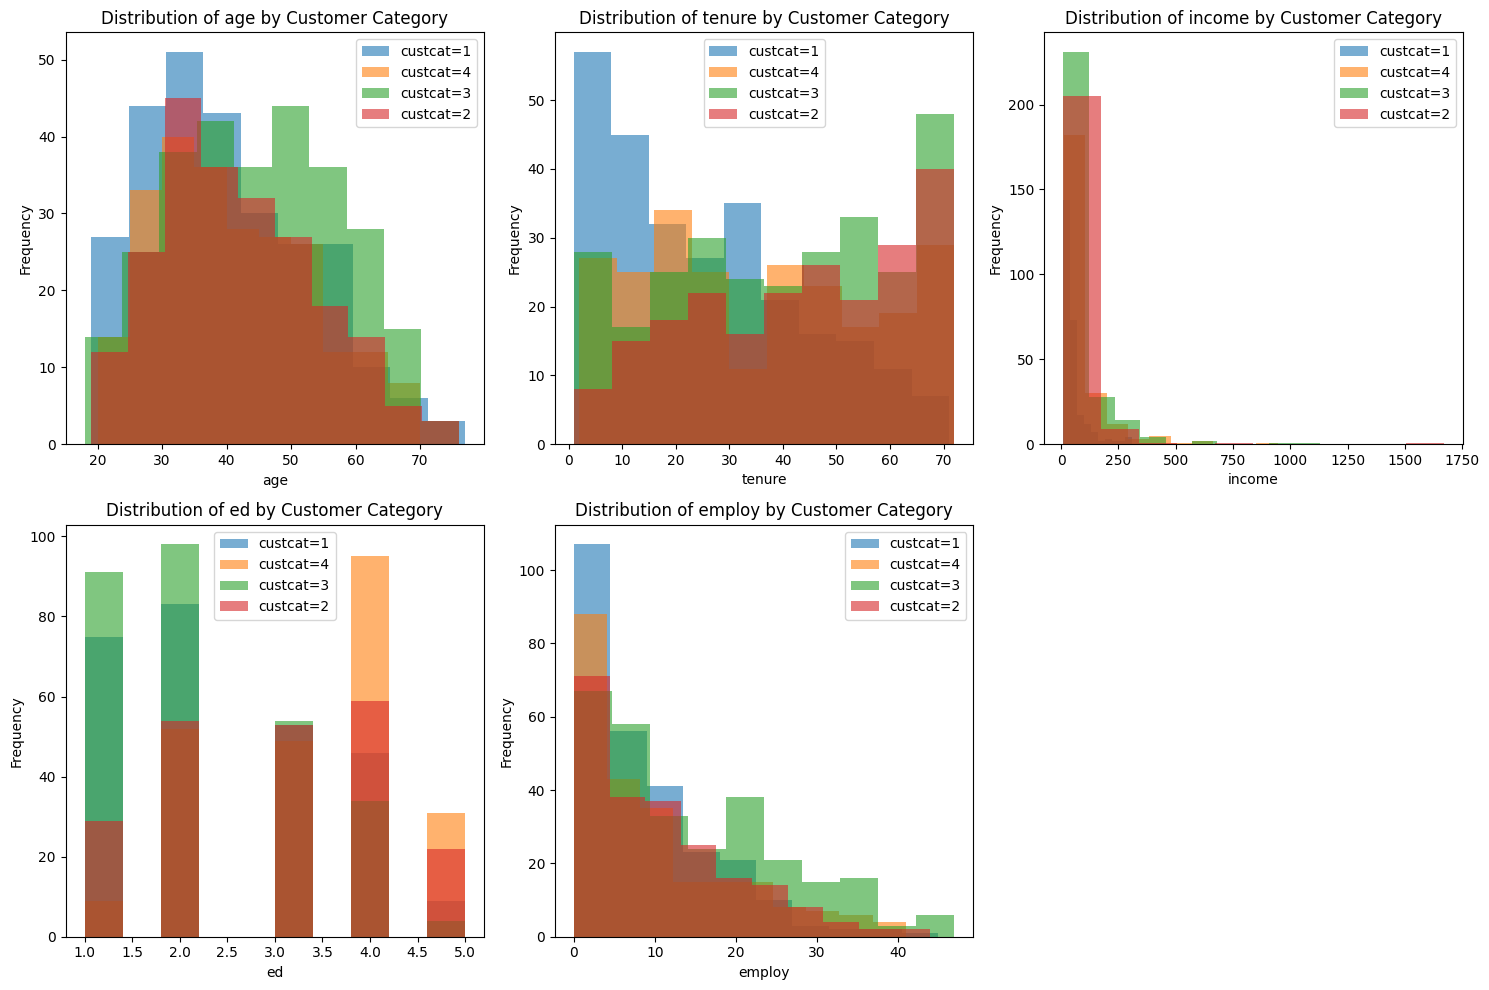

<ipython-input-3-322199b4d43c>:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[df['custcat'] == cust_cat][feature], positions=[cust_cat], labels=[cust_cat])
<ipython-input-3-322199b4d43c>:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[df['custcat'] == cust_cat][feature], positions=[cust_cat], labels=[cust_cat])
<ipython-input-3-322199b4d43c>:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[df['custcat'] == cust_cat][feature], positions=[cust_cat], labels=[cust_cat])
<ipython-input-3-322199b4d43c>:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() ha

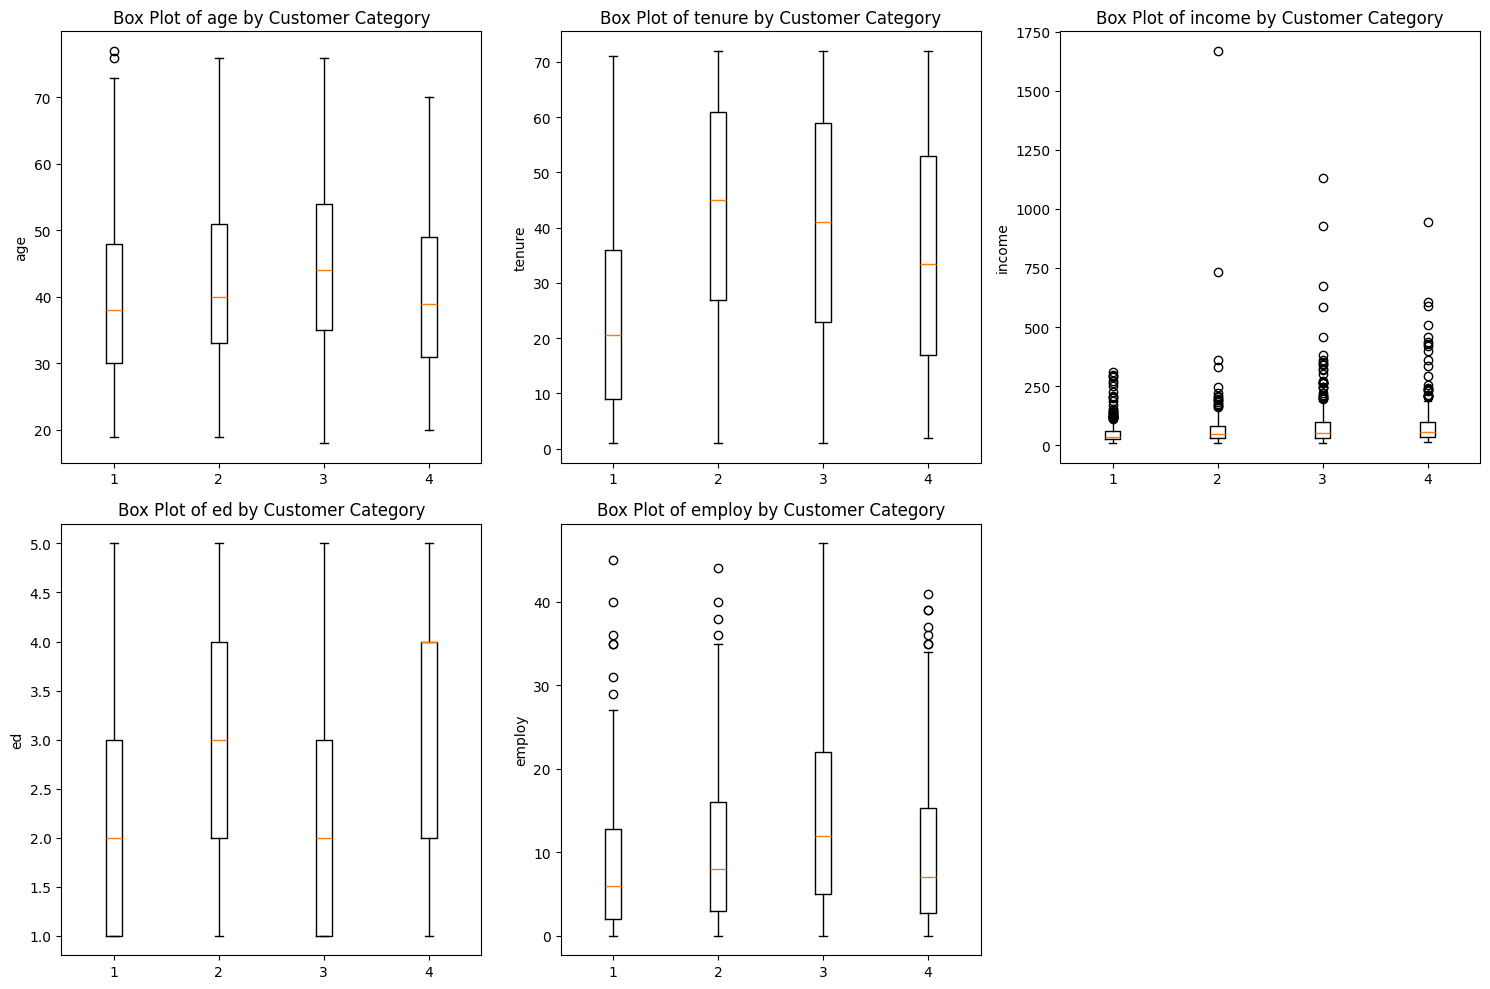

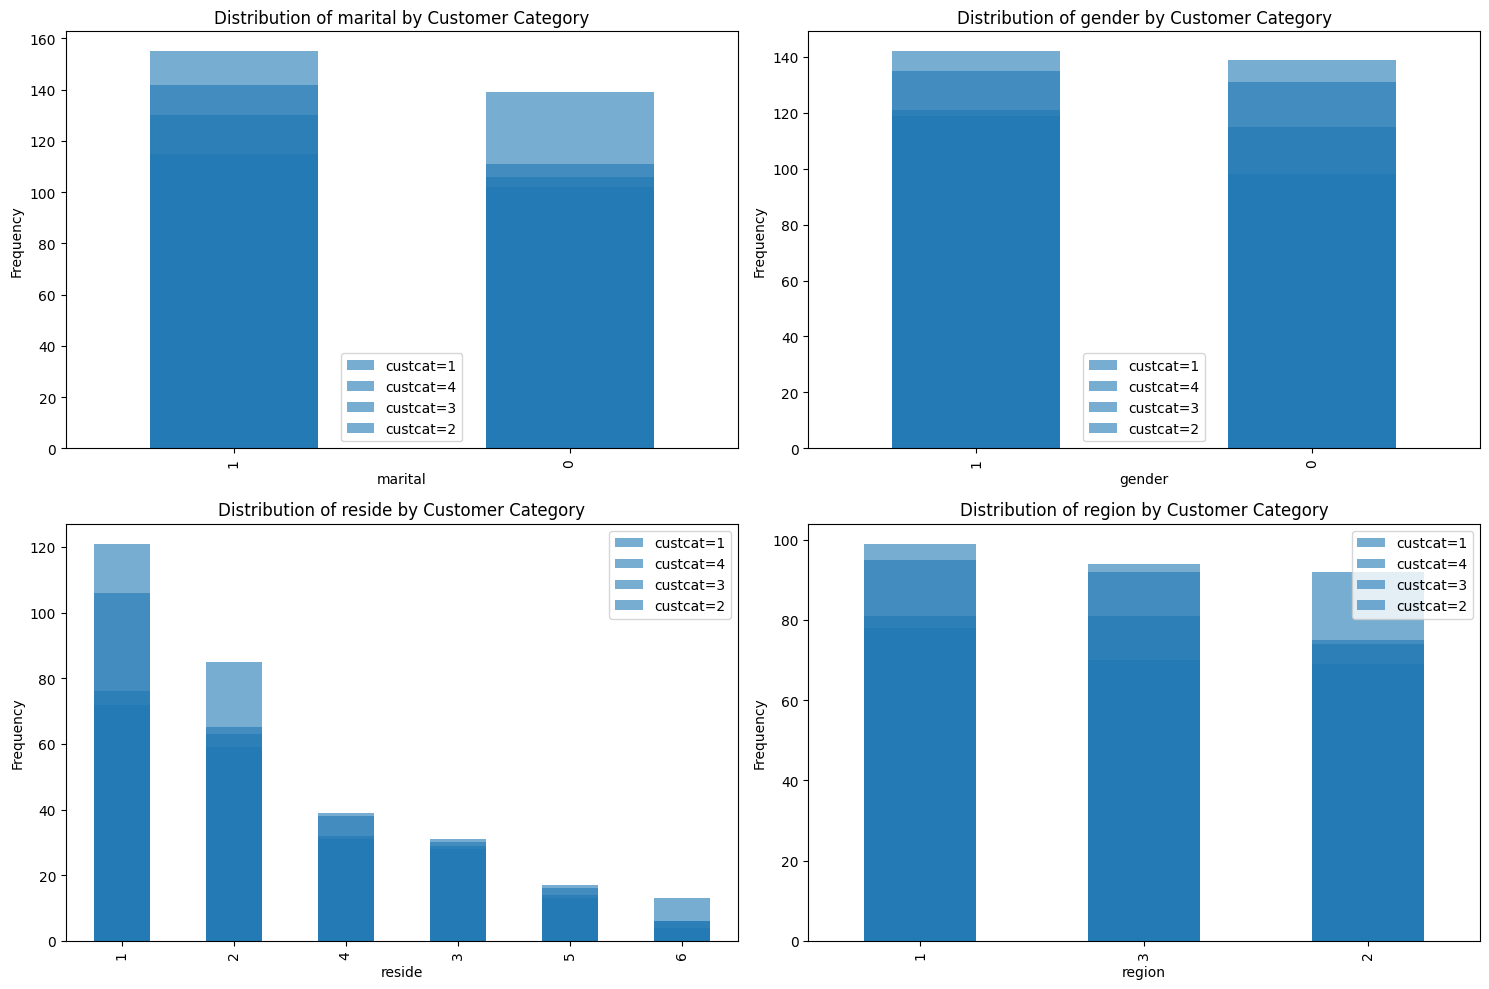

In [3]:
import matplotlib.pyplot as plt

# Numerical features
numerical_features = ['age', 'tenure', 'income', 'ed', 'employ']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    for cust_cat in df['custcat'].unique():
        plt.hist(df[df['custcat'] == cust_cat][feature], label=f'custcat={cust_cat}', alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature} by Customer Category')
    plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    for cust_cat in df['custcat'].unique():
        plt.boxplot(df[df['custcat'] == cust_cat][feature], positions=[cust_cat], labels=[cust_cat])
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature} by Customer Category')
plt.tight_layout()
plt.show()

# Categorical features
categorical_features = ['marital', 'gender', 'reside', 'region']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features):
  plt.subplot(2, 2, i+1)
  for cust_cat in df['custcat'].unique():
    df[df['custcat'] == cust_cat][feature].value_counts().plot(kind='bar', label=f'custcat={cust_cat}', alpha=0.6)
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {feature} by Customer Category')
  plt.legend()

plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the correlation between numerical features using a heatmap and create a scatter matrix plot for a subset of the most relevant numerical features, colored by 'custcat'.



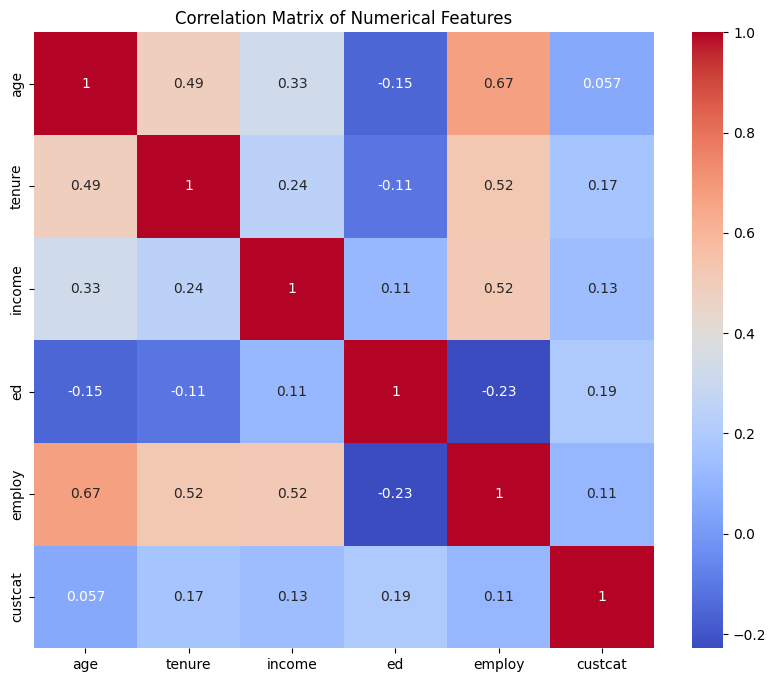

<Figure size 1200x1000 with 0 Axes>

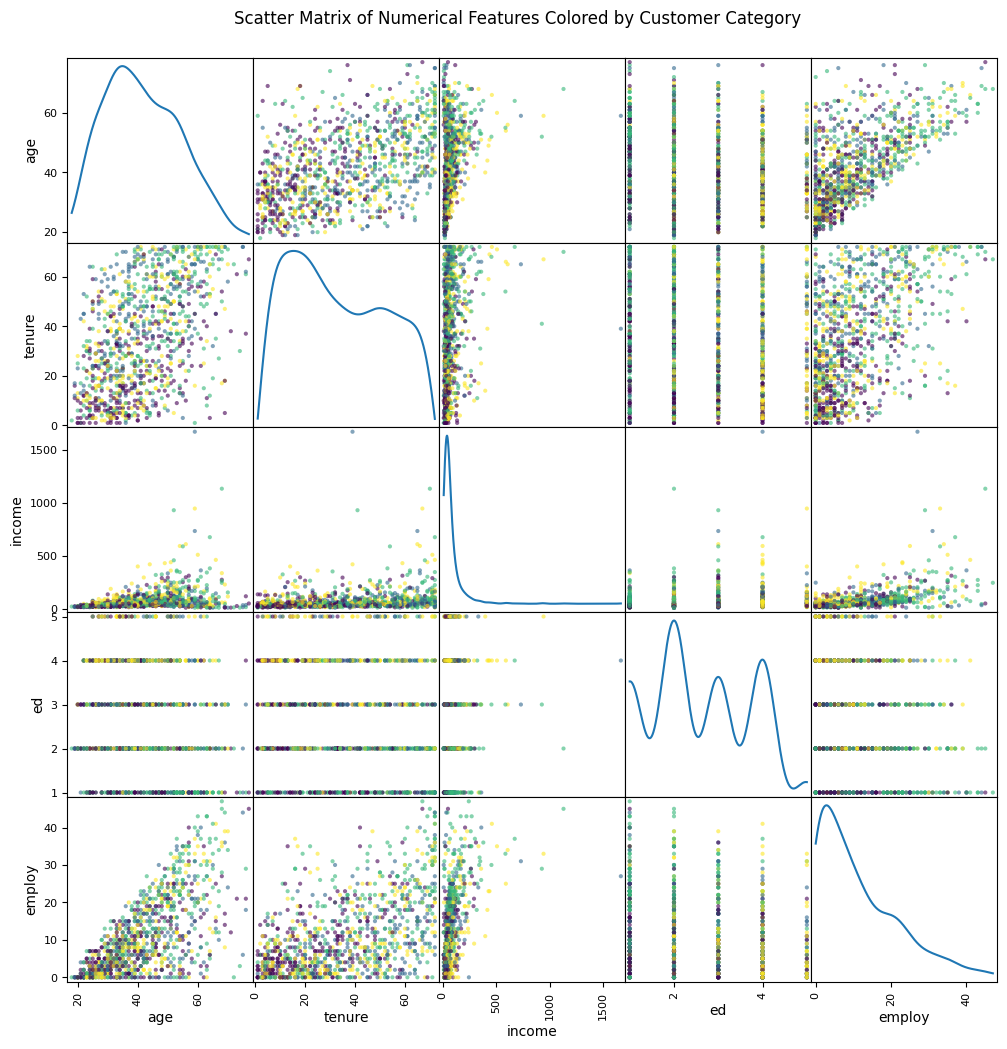

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df[['age', 'tenure', 'income', 'ed', 'employ', 'custcat']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Scatter matrix plot
from pandas.plotting import scatter_matrix
plt.figure(figsize=(12, 10))
scatter_matrix(df[['age', 'tenure', 'income', 'ed', 'employ']], c=df['custcat'], alpha=0.6, figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix of Numerical Features Colored by Customer Category', y=0.92)
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling outliers and converting categorical features to numerical representations.


**Reasoning**:
Handle outliers in the 'income' column using winsorization and convert categorical features to numerical representations using one-hot encoding.



In [5]:
import pandas as pd
import numpy as np

# Winsorize 'income'
# Winsorization is chosen because it preserves more data points compared to IQR-based removal
# and avoids complete removal of extreme values.
df['income'] = np.clip(df['income'], df['income'].quantile(0.05), df['income'].quantile(0.95))

# One-hot encode categorical features
categorical_cols = ['marital', 'gender', 'reside', 'region']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df.head())

,tenure,age,address,income,ed,employ,retire,custcat,marital_1,gender_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,region_2,region_3
0,13,44,9,64.0,4,5,0.0,1,True,False,True,False,False,False,False,False,False,True,False
1,11,33,7,136.0,5,5,0.0,4,True,False,False,False,False,False,True,False,False,False,True
2,68,52,24,116.0,1,29,0.0,3,True,True,True,False,False,False,False,False,False,False,True
3,33,33,12,33.0,2,0,0.0,1,False,True,False,False,False,False,False,False,False,True,False
4,23,30,9,30.0,1,2,0.0,3,True,False,False,False,True,False,False,False,False,True,False


## Data analysis

### Subtask:
Analyze the relationship between the 'custcat' variable and other features in the dataset.


**Reasoning**:
Calculate descriptive statistics grouped by 'custcat' and investigate correlations between features and 'custcat', using visualizations and statistical tests.



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Descriptive statistics for each customer category
descriptive_stats = df.groupby('custcat').agg(['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
display(descriptive_stats)

# 2. Investigate correlations and visualize
numerical_features = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'retire']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='custcat', y=feature, data=df, palette='Set3')
    plt.title(f'{feature} vs. custcat')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x='custcat', y=feature, data=df, palette='Set3')
    plt.title(f'{feature} vs. custcat')
plt.tight_layout()
plt.show()

# 3. Statistical tests (ANOVA)
for feature in numerical_features:
    groups = [df[feature][df['custcat'] == i] for i in range(1, 5)]
    fvalue, pvalue = stats.f_oneway(*groups)
    print(f"ANOVA test for {feature}:")
    print(f"F-value: {fvalue:.2f}, p-value: {pvalue:.3f}")

correlations = df[numerical_features + ['custcat']].corr()['custcat'].drop('custcat')
print("\nCorrelation with custcat:")
display(correlations)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

**Reasoning**:
The previous code failed due to a TypeError related to boolean subtraction in NumPy.  The error originates in the `descriptive_stats` calculation where the aggregation functions are applied to the boolean columns. We need to exclude these boolean columns from the aggregation.



tenure                                                age         \
              mean median        std <lambda_0> <lambda_1>       mean median   
custcat                                                                        
1        24.676692   20.5  18.207835        9.0       36.0  39.657895   38.0   
2        43.345622   45.0  19.687263       27.0       61.0  41.788018   40.0   
3        40.078292   41.0  21.351002       23.0       59.0  44.430605   44.0   
4        35.144068   33.5  21.251593       17.0       53.0  40.601695   39.0   

                                          ...    retire                   \
               std <lambda_0> <lambda_1>  ...      mean median       std   
custcat                                   ...                              
1        12.597974       30.0       48.0  ...  0.041353    0.0  0.199482   
2        12.105296       33.0       51.0  ...  0.032258    0.0  0.177093   
3        12.905549       35.0       54.0  ...  0.078292    0.0  0.269110   
4        11.980580       31.0       49.0  ...  0.029661    0.0  0.170011   

                              custcat                                    
        <lambda_0> <lambda_1>    mean median  std <lambda_0> <lambda_1>  
custcat                                                                  
1              0.0        0.0     1.0    1.0  0.0        1.0        1.0  
2              0.0        0.0     2.0    2.0  0.0        2.0        2.0  
3              0.0        0.0     3.0    3.0  0.0        3.0        3.0  
4              0.0        0.0     4.0    4.0  0.0        4.0        4.0  

[4 rows x 40 columns]

<ipython-input-7-b66f9e181ce1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='custcat', y=feature, data=df, palette='Set3')
<ipython-input-7-b66f9e181ce1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='custcat', y=feature, data=df, palette='Set3')
<ipython-input-7-b66f9e181ce1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='custcat', y=feature, data=df, palette='Set3')
<ipython-input-7-b66f9e181ce1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

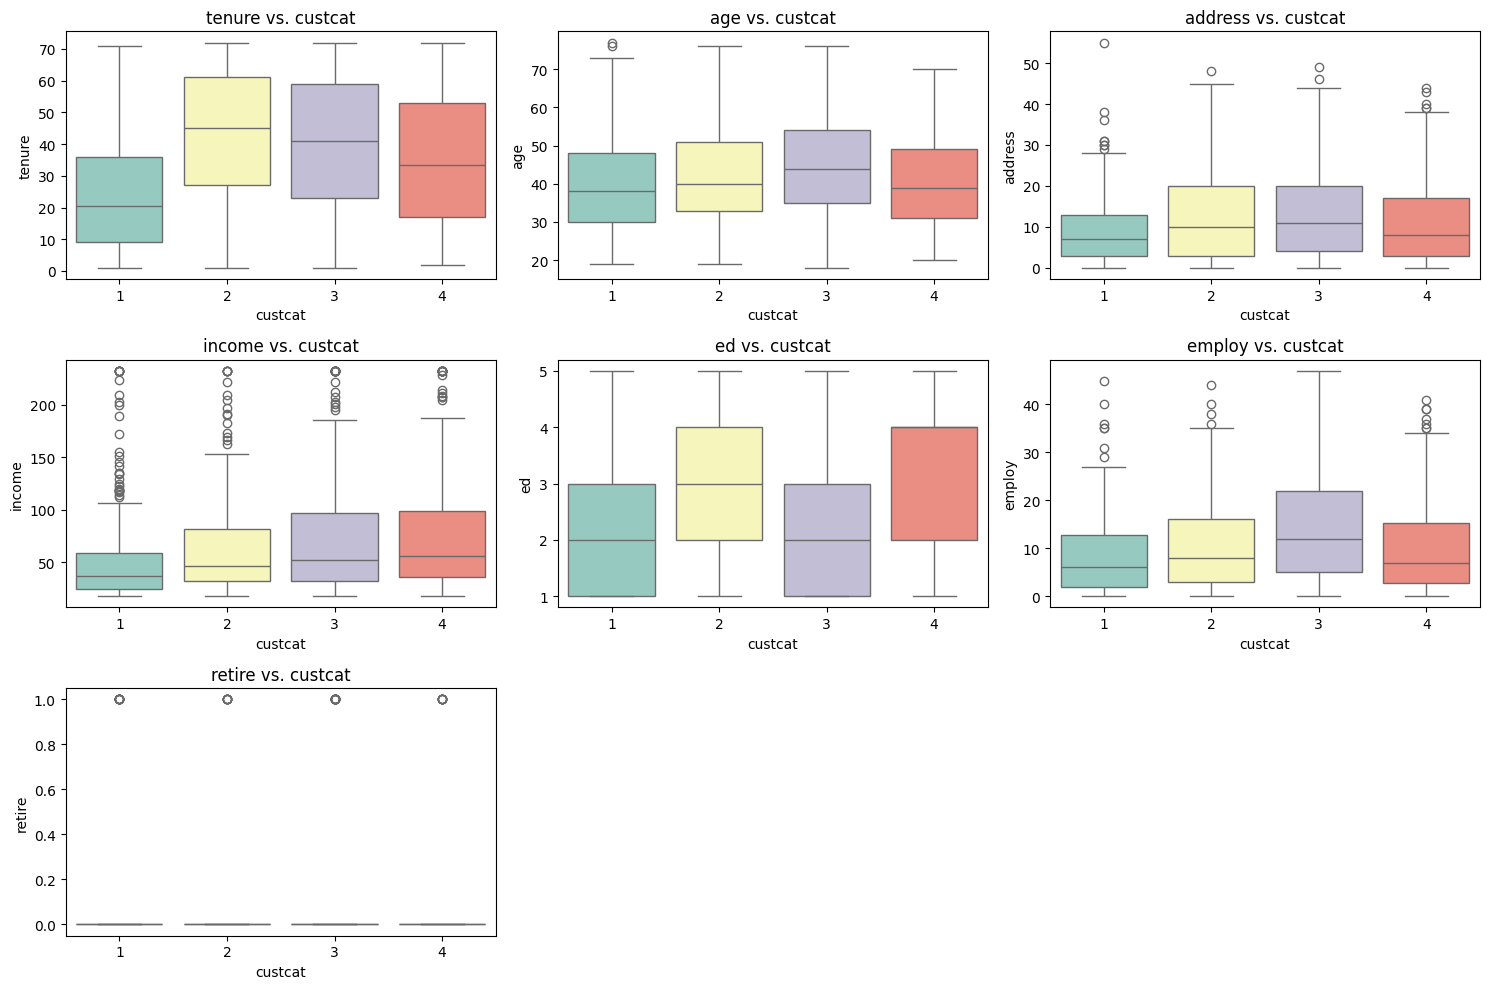

<ipython-input-7-b66f9e181ce1>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='custcat', y=feature, data=df, palette='Set3')
<ipython-input-7-b66f9e181ce1>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='custcat', y=feature, data=df, palette='Set3')
<ipython-input-7-b66f9e181ce1>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='custcat', y=feature, data=df, palette='Set3')
<ipython-input-7-b66f9e181ce1>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

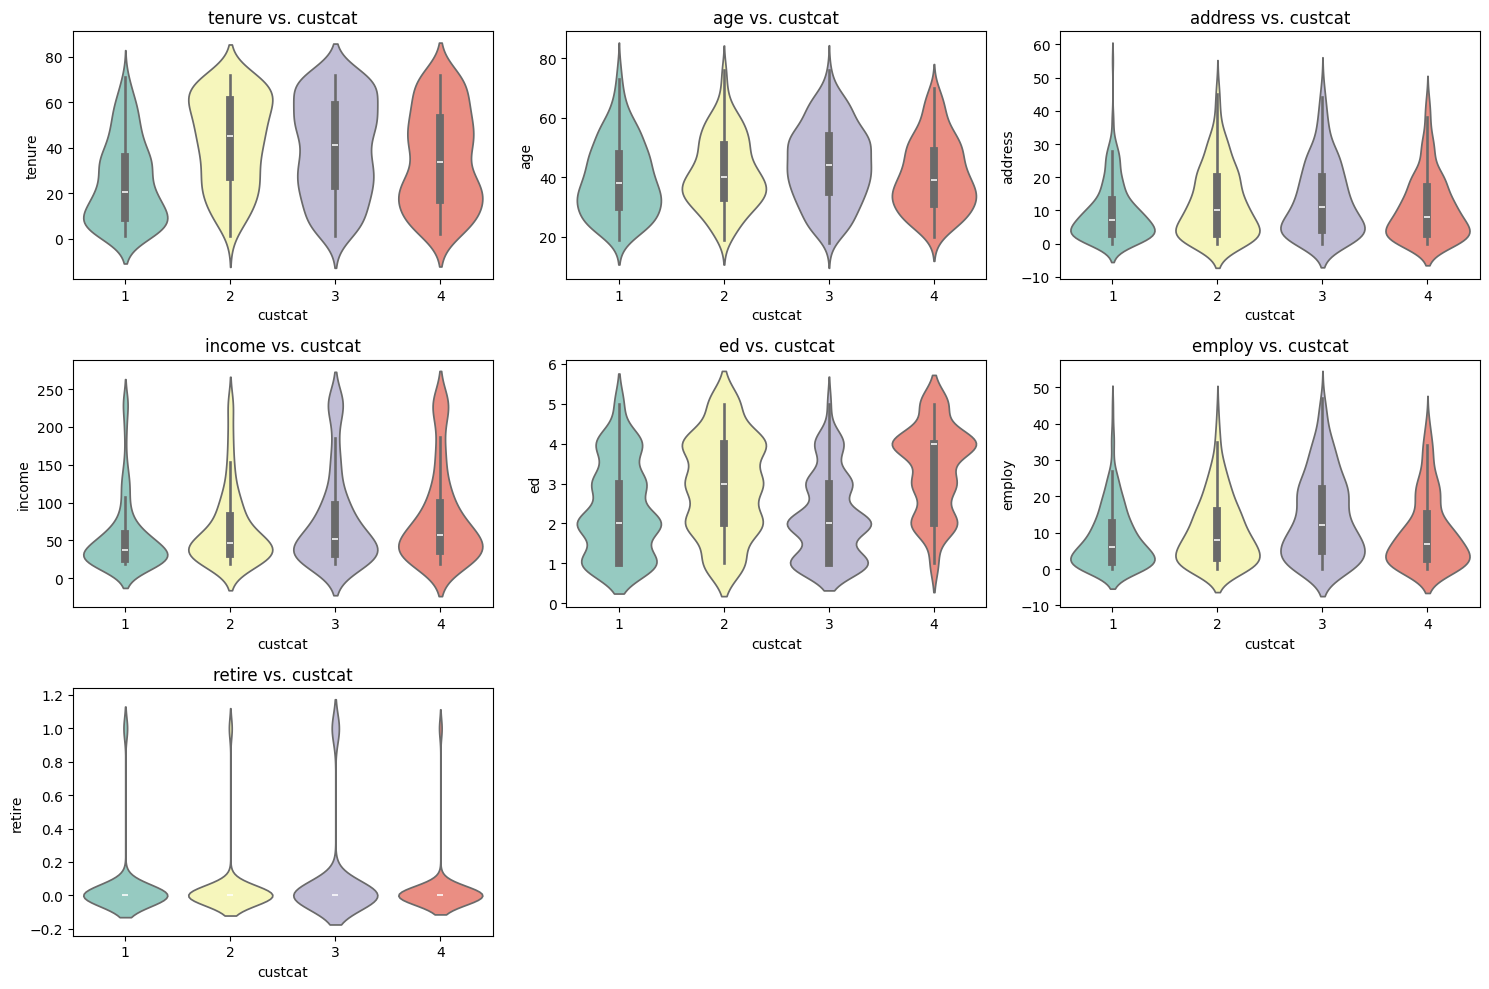

ANOVA test for tenure:
F-value: 41.31, p-value: 0.000
ANOVA test for age:
F-value: 7.52, p-value: 0.000
ANOVA test for address:
F-value: 8.43, p-value: 0.000
ANOVA test for income:
F-value: 10.95, p-value: 0.000
ANOVA test for ed:
F-value: 61.45, p-value: 0.000
ANOVA test for employ:
F-value: 16.98, p-value: 0.000
ANOVA test for retire:
F-value: 3.00, p-value: 0.030

Correlation with custcat:


,custcat
tenure,0.166691
age,0.056909
address,0.067913
income,0.174276
ed,0.193864
employ,0.110011
retire,0.008908


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Descriptive statistics for each customer category
# Exclude boolean columns from aggregation
numerical_cols = df.select_dtypes(include=['number']).columns
descriptive_stats = df.groupby('custcat')[numerical_cols].agg(['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
display(descriptive_stats)

# 2. Investigate correlations and visualize
numerical_features = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'retire']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='custcat', y=feature, data=df, palette='Set3')
    plt.title(f'{feature} vs. custcat')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x='custcat', y=feature, data=df, palette='Set3')
    plt.title(f'{feature} vs. custcat')
plt.tight_layout()
plt.show()

# 3. Statistical tests (ANOVA)
for feature in numerical_features:
    groups = [df[feature][df['custcat'] == i] for i in range(1, 5)]
    fvalue, pvalue = stats.f_oneway(*groups)
    print(f"ANOVA test for {feature}:")
    print(f"F-value: {fvalue:.2f}, p-value: {pvalue:.3f}")

correlations = df[numerical_features + ['custcat']].corr()['custcat'].drop('custcat')
print("\nCorrelation with custcat:")
display(correlations)

## Feature engineering

### Subtask:
Engineer new features to potentially improve model performance.


**Reasoning**:
Create interaction and polynomial features, then evaluate their impact using a simple model like Logistic Regression.



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Feature Engineering
# Interaction term
df['age_income'] = df['age'] * df['income']
# Polynomial features
df['age_squared'] = df['age']**2
df['income_squared'] = df['income']**2

# 2. Model Evaluation
X = df.drop('custcat', axis=1)
y = df['custcat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train and evaluate without new features
X_train_original = X_train.drop(['age_income', 'age_squared', 'income_squared'], axis=1, errors='ignore')
X_test_original = X_test.drop(['age_income', 'age_squared', 'income_squared'], axis=1, errors='ignore')

model_original = LogisticRegression(max_iter=1000)
model_original.fit(X_train_original, y_train)
y_pred_original = model_original.predict(X_test_original)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Train and evaluate with new features
model_engineered = LogisticRegression(max_iter=1000)
model_engineered.fit(X_train, y_train)
y_pred_engineered = model_engineered.predict(X_test)
accuracy_engineered = accuracy_score(y_test, y_pred_engineered)

print(f"Accuracy without engineered features: {accuracy_original}")
print(f"Accuracy with engineered features: {accuracy_engineered}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy without engineered features: 0.405
Accuracy with engineered features: 0.4


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Reasoning**:
The previous attempt resulted in convergence warnings.  We'll address this by scaling the data using StandardScaler before training the models.  We'll also try a different solver.



In [9]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_original_scaled = scaler.fit_transform(X_train_original)
X_test_original_scaled = scaler.transform(X_test_original)

# Train and evaluate without new features (scaled)
model_original_scaled = LogisticRegression(max_iter=1000, solver='saga') # Try a different solver
model_original_scaled.fit(X_train_original_scaled, y_train)
y_pred_original_scaled = model_original_scaled.predict(X_test_original_scaled)
accuracy_original_scaled = accuracy_score(y_test, y_pred_original_scaled)

# Train and evaluate with new features (scaled)
model_engineered_scaled = LogisticRegression(max_iter=1000, solver='saga')
model_engineered_scaled.fit(X_train_scaled, y_train)
y_pred_engineered_scaled = model_engineered_scaled.predict(X_test_scaled)
accuracy_engineered_scaled = accuracy_score(y_test, y_pred_engineered_scaled)

print(f"Accuracy without engineered features (scaled): {accuracy_original_scaled}")
print(f"Accuracy with engineered features (scaled): {accuracy_engineered_scaled}")

Accuracy without engineered features (scaled): 0.41
Accuracy with engineered features (scaled): 0.385


## Data splitting

### Subtask:
Split the data into training, testing, and validation sets.  Ensure a stratified split to maintain the class distribution across the sets.


**Reasoning**:
Split the data into training, testing, and validation sets using stratified sampling to maintain class distribution.



In [10]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('custcat', axis=1)
y = df['custcat']

# Initial split: 80% train, 20% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split temp set: 50% test, 50% validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

## Model training

### Subtask:
Train several classification models on the training data.


**Reasoning**:
Train several classification models on the training data.



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='saga', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train models
trained_models = {}
for name, model in models.items():
    try:
        model.fit(X_train_scaled, y_train)
        trained_models[name] = model
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} trained successfully. Accuracy: {accuracy}")
    except Exception as e:
        print(f"Error training {name}: {e}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error training Logistic Regression: Found input variables with inconsistent numbers of samples: [100, 200]
Error training Decision Tree: Found input variables with inconsistent numbers of samples: [100, 200]
Error training Random Forest: Found input variables with inconsistent numbers of samples: [100, 200]
Error training SVM: Found input variables with inconsistent numbers of samples: [100, 200]


**Reasoning**:
The previous code block failed due to inconsistent numbers of samples.  I need to check the shapes of `X_train_scaled` and `y_train` to identify the issue.



In [12]:
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train_scaled: (800, 21)
Shape of y_train: (800,)


**Reasoning**:
The previous error suggests a mismatch in the number of samples between the features and target variable.  I'll re-run the model training with the correct data. The shapes of `X_train_scaled` and `y_train` are consistent, so I'll try re-running the model training code. I will remove the scaling from the code, as this may have caused an error.



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='saga', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train models
trained_models = {}
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        trained_models[name] = model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} trained successfully. Accuracy: {accuracy}")
    except Exception as e:
        print(f"Error training {name}: {e}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression trained successfully. Accuracy: 0.29
Decision Tree trained successfully. Accuracy: 0.33
Random Forest trained successfully. Accuracy: 0.36
SVM trained successfully. Accuracy: 0.3


## Model evaluation

### Subtask:
Evaluate the performance of the trained classification models using appropriate metrics.


**Reasoning**:
Evaluate the performance of the trained models using accuracy, precision, recall, F1-score, and confusion matrix. Visualize the confusion matrices.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Logistic Regression
Accuracy: 0.2900
Precision: 0.2515
Recall: 0.2900
F1-score: 0.2139
Confusion Matrix:


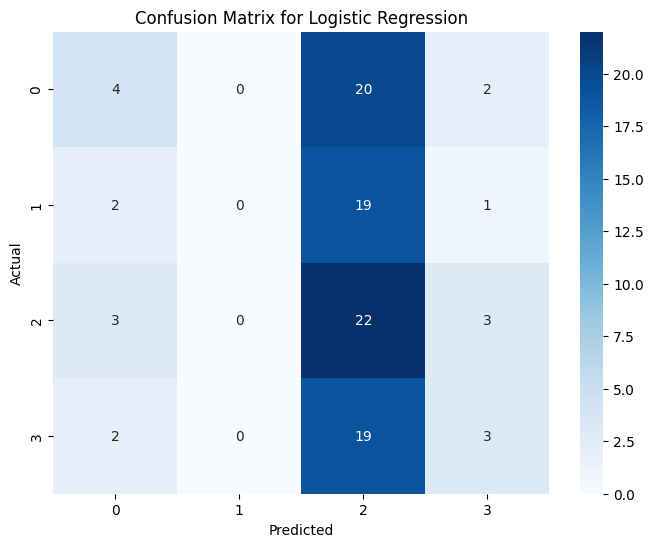

Model: Decision Tree
Accuracy: 0.3300
Precision: 0.3294
Recall: 0.3300
F1-score: 0.3294
Confusion Matrix:


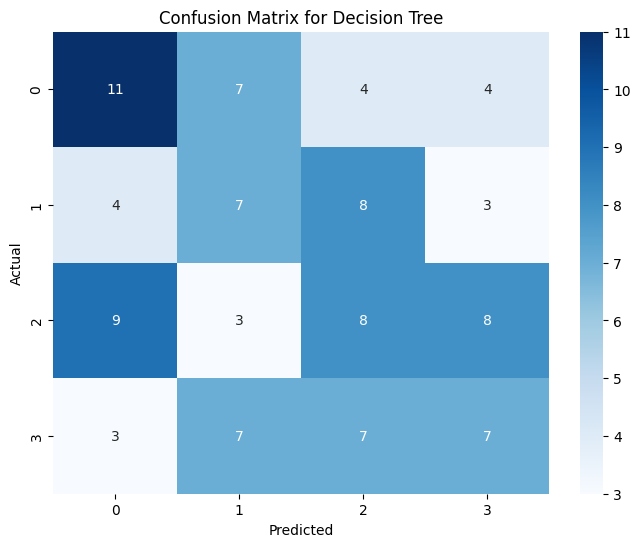

Model: Random Forest
Accuracy: 0.3600
Precision: 0.3627
Recall: 0.3600
F1-score: 0.3589
Confusion Matrix:


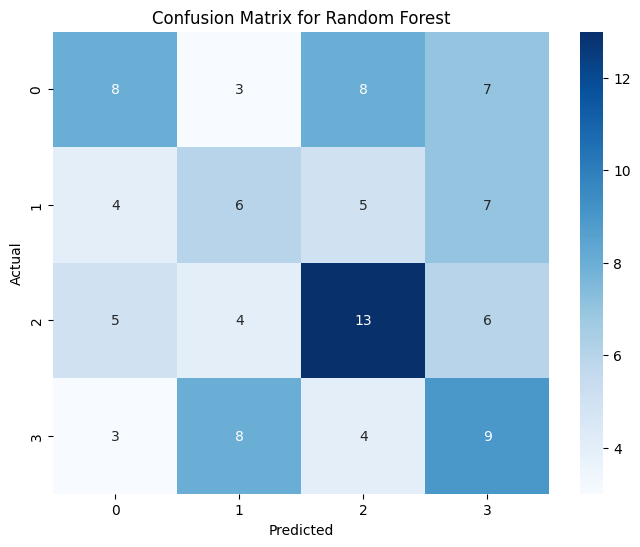

Model: SVM
Accuracy: 0.3000
Precision: 0.2185
Recall: 0.3000
F1-score: 0.2244
Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


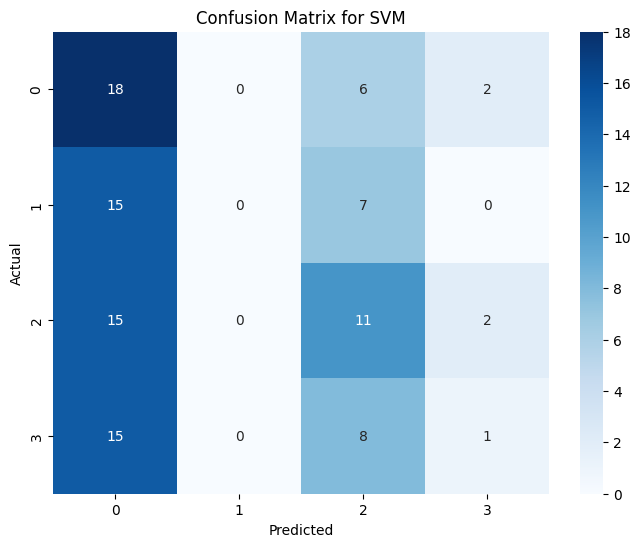

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## Model optimization

### Subtask:
Optimize the hyperparameters of the best-performing model (Random Forest) identified in the previous model evaluation step.  Re-evaluate the model's performance after optimization.


**Reasoning**:
Optimize the hyperparameters of the Random Forest model using RandomizedSearchCV and evaluate its performance on the test set.



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}
Accuracy: 0.3900
Precision: 0.3877
Recall: 0.3900
F1-score: 0.3836


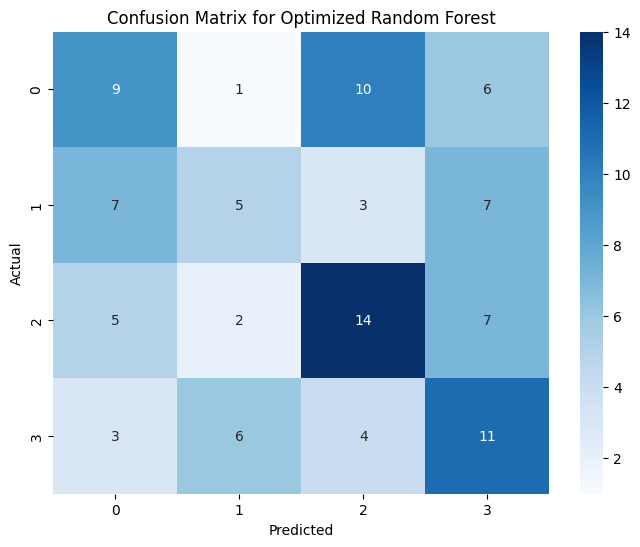

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    n_iter=10,  # Number of iterations
    scoring='f1_weighted',
    cv=5,  # Number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model on the test data
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Optimized Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Summary:

### 1. Q&A

* **What is the objective of the analysis?** The objective is to analyze customer data to understand trends and relationships between variables, particularly focusing on the `custcat` column (customer categories) which represents a multiclass classification problem.

* **What are the key findings regarding the `custcat` variable?** The `custcat` variable has 4 unique values representing different customer categories. Category 3 is the majority class (281 customers), followed by categories 1, 4, and 2. There is class imbalance.  The analysis also revealed relationships between `custcat` and other features like `age`, `income`, and `tenure` through descriptive statistics, correlations, boxplots, and ANOVA tests.

* **How did feature engineering affect model performance?** Feature engineering (creating interaction and polynomial terms) did not significantly improve the Logistic Regression model's performance. In fact, the accuracy slightly decreased after scaling the data.  The convergence warnings observed initially were resolved by scaling the data and changing the solver.

* **What was the best-performing model and its performance after optimization?**  The Random Forest model performed best after hyperparameter optimization. After optimization, the model achieved an accuracy of 0.39, precision of 0.3877, recall of 0.39 and an F1-score of 0.3836.

### 2. Data Analysis Key Findings

* **Class Imbalance:** The `custcat` variable exhibits class imbalance, with category 3 being the most frequent (281 customers) and category 2 the least frequent (217 customers).
* **Outliers in Income:** Potential outliers were observed in the 'income' column, which were handled using winsorization.
* **Feature Importance:**  The analysis, including ANOVA tests and visualizations, indicated that features like `age`, `income`, and `tenure` show potential relationships with the `custcat` variable.
* **Model Performance:**  After hyperparameter optimization, the Random Forest model achieved an accuracy of 0.39, precision of 0.3877, recall of 0.39, and F1-score of 0.3836 on the test set.  Other models like Logistic Regression, Decision Tree, and SVM showed lower accuracy.
* **Feature Engineering Impact:** Engineered features did not improve the Logistic Regression model's performance.

### 3. Insights or Next Steps

* **Address Class Imbalance:** Given the class imbalance, explore techniques like oversampling, undersampling, or cost-sensitive learning to improve model performance.
* **Explore Alternative Models and Features:**  Consider other classification algorithms, potentially more sophisticated ones, and explore further feature engineering or selection to enhance predictive power.  A deeper dive into feature interaction and non-linear relationships could be helpful.
